In [42]:
import numpy as np
import xarray as xr
import cartopy as cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patheffects as pe
import regionmask
import pandas as pd
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap


In [30]:
ds = xr.open_dataset("t_ERA5_mon_194001-202212.nc")

/home/yaizaquintana/miniforge3/envs/cica/lib/python3.12/site-packages/xarray/conventions.py:440: SerializationWarning: variable 't' has multiple fill values {1.0384594e+34, -1.7014118e+38}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


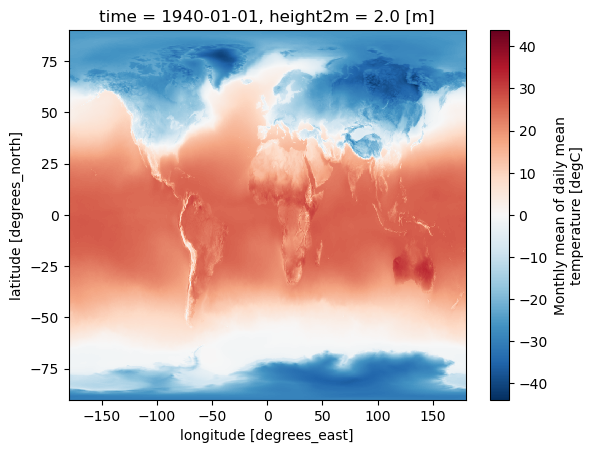

In [6]:
ds['t'].isel(time = 0).plot()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ds['t'].mean(dim='time').plot(ax=ax)

ax.add_feature(cfeature.COASTLINE)

plt.show()
year

In [ ]:
# regions can be selected by number, abbreviation or long name
regions = [19]

# choose a good projection for regional maps
projection = ccrs.LambertConformal()

ax = regionmask.defined_regions.ar6.land[regions].plot(
    add_ocean=True,)
ds['t'].mean(dim='time').plot(ax=ax)

ax.set_extent([-15, 45, 28, 50])
ax.add_feature(cfeature.COASTLINE)
plt.show()

In [ ]:
mean_time=ds['t'].mean(dim='time').compute
print(mean_time)

In [ ]:
# choose a good projection for regional maps
regions_ar6_land = regionmask.defined_regions.ar6.land
proj = ccrs.LambertConformal(central_longitude=-100)
region_19_mask = regions_ar6_land.mask(ds['t'].mean(dim='time')) == 19
ax = plt.subplot(111, projection=proj)

regionmask.defined_regions.ar6.land[[19]].plot(ax=ax, add_label=False)

ds['t'].mean(dim='time').where(region_19_mask).plot(ax=ax,transform=ccrs.PlateCarree())
ax.set_extent([-15, 45, 28, 50])
ax.coastlines();

In [ ]:
# choose a good projection for regional maps
regions_ar6_land = regionmask.defined_regions.ar6.land
proj = ccrs.PlateCarree()
region_19_mask = regions_ar6_land.mask(ds['t'].mean(dim='time')) == 19
ax = plt.subplot(111, projection=proj)

regionmask.defined_regions.ar6.land[[19]].plot(ax=ax, add_label=False)

ds['t'].mean(dim='time').where(region_19_mask).plot(ax=ax)
ax.set_extent([-15, 45, 28, 50])
ax.coastlines();

In [ ]:
ds_mean_MED = ds['t'].mean(dim='time').where(region_19_mask)

In [ ]:
plt.figure(figsize=(12, 5))

# Calcular la media a lo largo de las dimensiones 'lat' y 'lon'
mean_t = ds['t'].mean(dim=['lat', 'lon'])

# Trazar la media de 't' contra el tiempoplt.plot(mean_t_region_19['time'], mean_t_region_19)
plt.plot(mean_t['time'], mean_t)
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))

regions_ar6_land = regionmask.defined_regions.ar6.land
region_19_mask = regions_ar6_land.mask(ds['t']) == 19
t_region_19 = ds['t'].where(region_19_mask)
mean_t = t_region_19.mean(dim=['lat', 'lon'])

#plt.plot(mean_t['time'], mean_t)

mean_t_last_5_years = mean_t.isel(time=slice(-60, None))  # Últimos 5 años (60 meses)

plt.plot(mean_t_last_5_years['time'], mean_t_last_5_years)
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()



In [3]:
#mean_t = ds['t'].mean(dim=['lat', 'lon'])

dates = pd.to_datetime(ds['time'].values)

years = np.array([date.year for date in dates])

ds_with_years = ds.assign_coords(year=('time', years))

mean_t_year = ds_with_years['t'].groupby('year').mean(dim=['lat', 'lon','time'] )

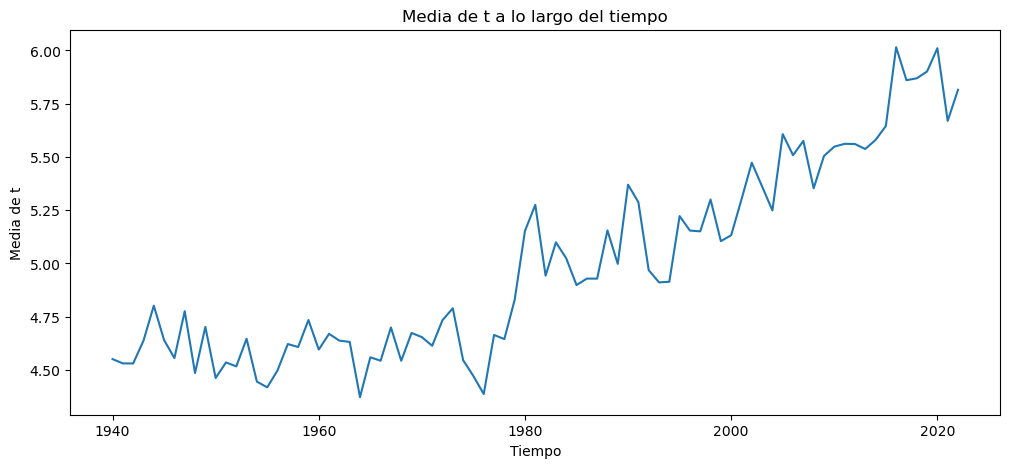

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(mean_t_year['year'], mean_t_year)
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()

In [ ]:
weights = np.cos(np.deg2rad(ds_with_years_weighted['lat']))
ds_with_years_weighted=ds_with_years_weighted.weighted(weights).mean(dim=['lat', 'lon'] )

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(ds_with_years_weighted ['year'], ds_with_years_weighted )
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()


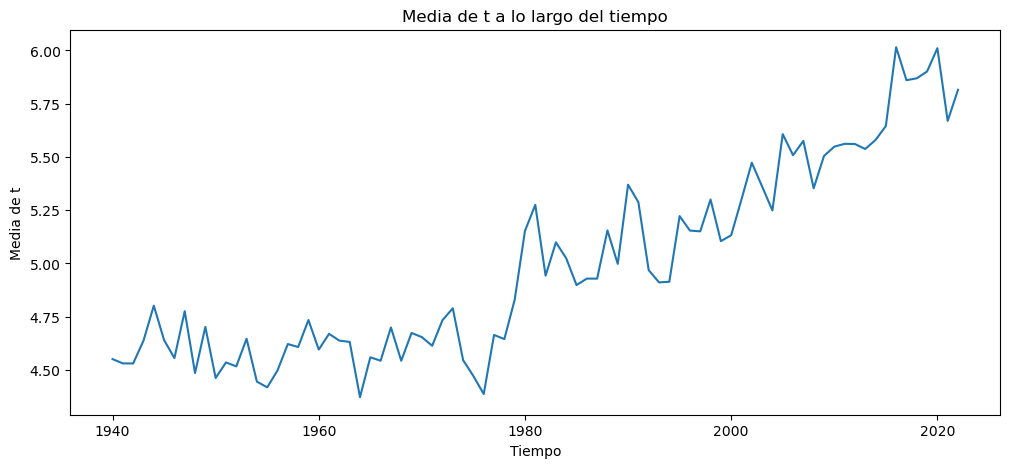

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(region_mean_t_year['year'],region_mean_t_year['t'])
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()


In [5]:
mean_t_year_region= ds_with_years['t'].groupby('year').mean(dim=['time'] )

In [12]:
regions_ar6_land = regionmask.defined_regions.ar6.land
region_19_mask_year = regions_ar6_land.mask(mean_t_year_region) == 19
print(region_19_mask_year)
t_region_19_mask_year = mean_t_year_region.where(region_19_mask_year)
mean_t_region = t_region_19_mask_year.mean(dim=['lat', 'lon'])

<xarray.DataArray 'mask' (lat: 721, lon: 1440)> Size: 1MB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * lat       (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
    height2m  float64 8B 2.0
  * lon       (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8


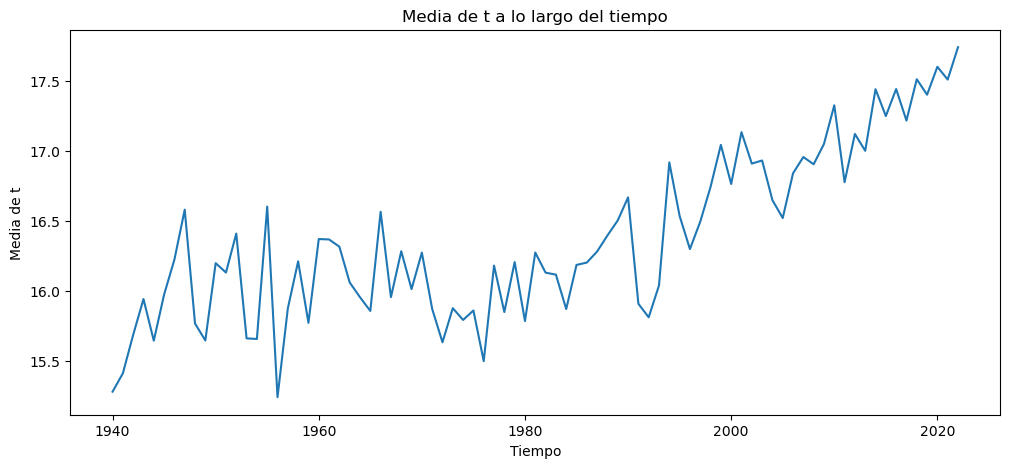

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(mean_t_region['year'], mean_t_region)
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()

In [17]:
weights = np.cos(np.deg2rad(t_region_19_mask_year['lat']))
region_with_years_weighted=t_region_19_mask_year.weighted(weights).mean(dim=['lat', 'lon'] )

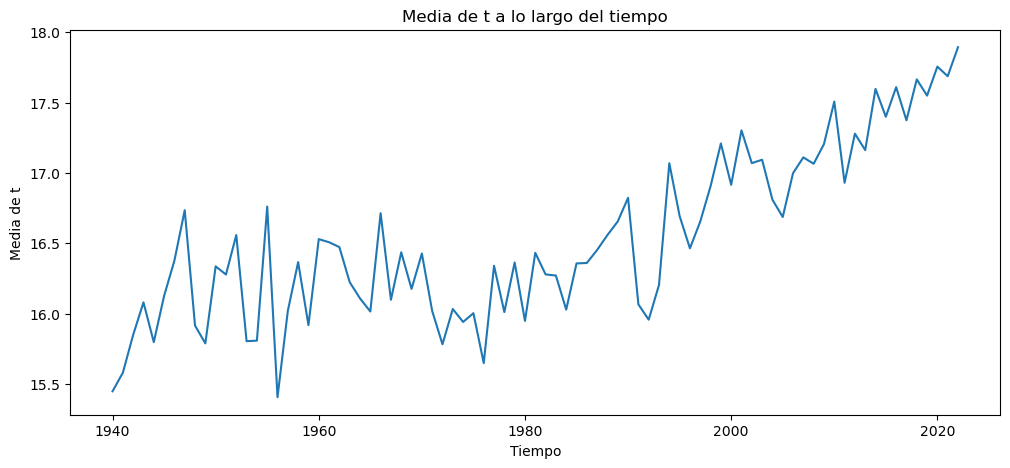

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(region_with_years_weighted['year'], region_with_years_weighted)
plt.xlabel('Tiempo')
plt.ylabel('Media de t')
plt.title('Media de t a lo largo del tiempo')
plt.show()

(1940.0, 2024.0)

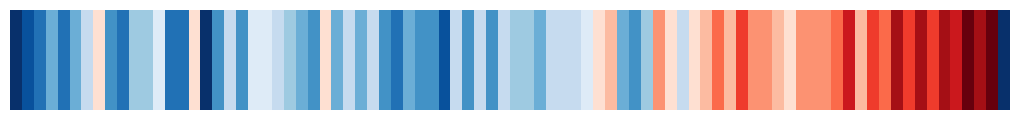

In [46]:
FIRST = 1940
LAST = 2023  # inclusive


# Reference period for the center of the color scale

FIRST_REFERENCE = 1971
LAST_REFERENCE = 2000
LIM = 0.7 # degrees





cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()
# create a collection with a rectangle for each year

col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(FIRST, LAST + 1)
])

# set data, colormap and color limits

col.set_array(region_with_years_weighted)
col.set_cmap(cmap)
ax.add_collection(col)
ax.set_ylim(0, 1)
ax.set_xlim(FIRST, LAST + 1)